# Homework 3: Optimization in Neural Network
---

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

---
## 1. Build up Deep Neural Network

---
### Initialization

**Exercise 1**:
1. The method `initialize_dnn_parameters` takes `layer_dims` array as input.
2. Loop through the array using `stdv * np.random.randn(a.b) + mu` to random initialize weights `parameters['W' + str(l)]` and using `np.zeros((a,1))` to initialize bias `parameters['b' + str(1)]`.
3. Return `parameters` as a dictionary containing all weights and biases.

In [3]:
def initialize_dnn_parameters(layer_dims):

    L = len(layer_dims) # Number of layers in the network
    parameters = {} # Dictionary to store parameters

    for l in range(1, L):
        
        # Initialize weight matrix and bias vector
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * (1 / np.sqrt(layer_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1)) 

    return parameters

In [4]:
n_x, n_h, n_y = 5, 4, 3
layer_dims = [n_x, n_h, n_y]
parameters = initialize_dnn_parameters(layer_dims)

In [5]:
for l in range(1, len(layer_dims)):
    print(f"W{l} = \n{parameters['W' + str(l)]}")
    print(f"b{l} = \n{parameters['b' + str(l)]}")

W1 = 
[[ 0.72642933 -0.27358579 -0.23620559 -0.47984616  0.38702206]
 [-1.0292794   0.78030354 -0.34042208  0.14267862 -0.11152182]
 [ 0.65387455 -0.92132293 -0.14418936 -0.17175433  0.50703711]
 [-0.49188633 -0.07711224 -0.39259022  0.01887856  0.26064289]]
b1 = 
[[0.]
 [0.]
 [0.]
 [0.]]
W2 = 
[[-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]
 [-0.13394404  0.26517773 -0.34583038 -0.19837676]]
b2 = 
[[0.]
 [0.]
 [0.]]


---
### Activation Functions and Its Derivatives

**Exercise 2**:
1. We will implement activaiton function in a `class` form that includes both evaluation in `forward()` and `derivative()`.
1. Implement `forward()` method for ReLU function `class` so `forward()` is automatically evaluted when ReLU is called.
2. Implement its `derivative` to compute the gradient during backpropagation.

In [6]:
class Sigmoid:
    
    # Initialize the class
    def __init__(self):
        pass

    # Define the forward pass of the Sigmoid function
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

    # Define the derivative of the Sigmoid function
    def derivative(self, x):
        return self.forward(x) * (1 - self.forward(x))

    # Allow the instance to be called like a function
    def __call__(self, x):
        return self.forward(x)

In [7]:
class ReLU:

    # Initialize the class
    def __init__(self):
        pass

    # Define the forward pass of the ReLU function
    def forward(self, x):
        return np.maximum(0, x)

    # Define the derivative of the ReLU function
    def derivative(self, x):
        return np.where(x >= 0, 1, 0)

    # Allow the instance to be called like a function
    def __call__(self, x):
        return self.forward(x)

In [8]:
x = np.random.randn(10)

In [9]:
print(f"x = \n{x}")
print(f"ReLU(x) = \n{ReLU()(x)}")
print(f"ReLU'(x) = \n{ReLU().derivative(x)}")

x = 
[-0.6871727  -0.84520564 -0.67124613 -0.0126646  -1.11731035  0.2344157
  1.65980218  0.74204416 -0.19183555 -0.88762896]
ReLU(x) = 
[0.         0.         0.         0.         0.         0.2344157
 1.65980218 0.74204416 0.         0.        ]
ReLU'(x) = 
[0 0 0 0 0 1 1 1 0 0]


---
### Forward Propogation

**Exercies 3**:
1. Implement a `layer` of DNN that take previous output `A_prev`, weights `W`, bias `b`, and activaiton `act` as input.
2. The `layer` should perform a linear transform followed by a nonlinear activaiton.
3. Return both the pre-activaiton `Z` and the activation `A`.

In [10]:
def layer(A_prev, W, b, act = ReLU()):

  Z = np.dot(W, A_prev) + b # Compute the linear combination of inputs
  A = act(Z) # Apply the activation function to Z

  return A, Z

In [11]:
num_samples = 5
X = np.random.randn(n_x, num_samples)
Y = np.random.randn(n_y, num_samples)

In [12]:
A_prev = X
W1 = parameters['W1']
b1 = parameters['b1']
A1, Z1 = layer(A_prev, W1, b1)

In [13]:
print(f"Z1 = \n{Z1}")
print(f"A1 = \n{A1}")

Z1 = 
[[-1.09575907  1.0266851  -0.31827206 -0.3506713  -0.12633385]
 [ 2.87245507 -1.45533316  0.57223289  0.59096241 -0.70441952]
 [-2.15866841  0.8461243  -0.40963115 -0.68640041  0.68699072]
 [ 0.80537242 -0.77691677  0.15346325  0.02594094 -0.07751913]]
A1 = 
[[0.         1.0266851  0.         0.         0.        ]
 [2.87245507 0.         0.57223289 0.59096241 0.        ]
 [0.         0.8461243  0.         0.         0.68699072]
 [0.80537242 0.         0.15346325 0.02594094 0.        ]]


**Exercise 4**:
In this exercise, you will stack multiple `layer` operations to build a DNN by implementing the `forward_propagation()` function.

 1. The function `forward_propagation()` takes `X`, `parameters`, and `act` as inputs.
 2. Calculate the number of layers `L=len(parameters)//2`, since each layer has two parameters: weights and biases.
 3. For each layer, retrieve the weights and biases from parameters and apply the `layer()` function to propagate forward.
 4. Store intermediate variables `Zl` and `Al` in `cache` for later use in backpropagation.
 5. At the end, return the final output `AL` and the `cache`.


In [14]:
def forward_propagation(X, parameters, act = ReLU()):

  L = len(parameters) // 2 # Number of layers
  A = X # Initialize A
  
  caches = {} # Dictionary to store intermediate values
  caches['A0'] = A # Store the initial input activations as A0

  for l in range(1, L + 1):
    A_prev = A # Activations from the previous layer
    W = parameters['W' + str(l)] # Weight matrix for the current layer
    b = parameters['b' + str(l)] # Bias vector for the current layer
    A, Z = layer(A_prev, W, b, act) # Compute the activations and pre-activation values
    caches['Z' + str(l)] = Z # Store the pre-activation values
    caches['A' + str(l)] = A # Store the pre-activations

  return A, caches

In [15]:
A, caches = forward_propagation(X, parameters, act = ReLU())
L = len(parameters) // 2

In [16]:
for l in range(1, L + 1):
    print(f"Z{l} = \n{caches['Z' + str(l)]}")

Z1 = 
[[-1.09575907  1.0266851  -0.31827206 -0.3506713  -0.12633385]
 [ 2.87245507 -1.45533316  0.57223289  0.59096241 -0.70441952]
 [-2.15866841  0.8461243  -0.40963115 -0.68640041  0.68699072]
 [ 0.80537242 -0.77691677  0.15346325  0.02594094 -0.07751913]]
Z2 = 
[[ 1.84643125 -0.18356575  0.36608149  0.34476193  0.30969223]
 [-1.35881023  0.41045749 -0.2674289  -0.2141661  -0.04221222]
 [ 0.60194395 -0.43013384  0.12129988  0.15156399 -0.23758226]]


---
### Compute the Cost

In [17]:
def compute_cost(A, Y):

    m = Y.shape[1] # Number of samples
    cost = np.sum((A - Y) ** 2) / (2 * m) # Compute the cost
    
    return cost

In [18]:
print(f"cost = {compute_cost(A, Y)}")

cost = 1.7072853869205002


---
### Back Propagation

**Exercise 4:** Implement `back_propogation()`
1. The function `back_propogation()` takes data `Y`, `parameters`, `caches`, and `act_derivative` as inputs.
2. For each hidden layer, retrieve weights and biases from `parameters`, and intermediate variables `Zl` and `Al` from `caches`.
3. Compute the gradients `dWl`, `dbl`, using the formulas provided.
4. Return the gradients in a variable `grads`.


In [19]:
def back_propagation(Y, parameters, caches, act_derivative = ReLU().derivative):

    # Number of layers and samples
    L = len(parameters) // 2
    m = Y.shape[1]

    # Initialize a dictionary
    grads = {}

    # Compute the derivative of the cost with respect to Z
    ZL = caches['Z' + str(L)]
    AL = caches['A' + str(L)]

    # Compute dZ for the last layer
    dZ = (AL - Y) / m * act_derivative(ZL)

    # Backpropagate through each layer
    for l in reversed(range(1, L + 1)):

        # Activations of the previous layer
        A_prev = caches['A' + str(l-1)]

        # Retrieve weights for the current layer
        W = parameters['W' + str(l)]

        # Compute gradients for weights and biases in the current layer
        dW = dZ @ A_prev.T
        db = np.sum(dZ, axis = 1, keepdims = True)

        # Store gradients for weights and biases in the grads dictionary
        grads['dW' + str(l)] = dW
        grads['db' + str(l)] = db
        
        if l > 1:
            Z_prev = caches['Z' + str(l - 1)] # Pre-activation values of the previous layer
            dZ = W.T @ dZ * act_derivative(Z_prev) # Compute the gradient for the previous layer

    return grads

In [20]:
grads = back_propagation(Y, parameters, caches, act_derivative = ReLU().derivative)
L = len(parameters) // 2

In [21]:
for l in range(1, L + 1):
    print(f"dW{l} = \n{grads['dW' + str(l)]}")
    print(f"db{l} = \n{grads['db' + str(l)]}")

dW1 = 
[[-0.07100506 -0.00504114  0.01465629 -0.0119815   0.01250615]
 [-0.1535268   0.2243261   0.06768908  0.00272228  0.07802137]
 [ 0.02370006 -0.02516877  0.05958518  0.09359966  0.0813598 ]
 [-0.06098153  0.1461884  -0.00877939  0.06790589  0.06303178]]
db1 = 
[[-0.04195389]
 [ 0.41779308]
 [ 0.07912688]
 [ 0.21442471]]
dW2 = 
[[ 0.          0.60078972  0.11186381  0.11598846]
 [-0.0956278   0.         -0.07880995  0.        ]
 [ 0.         -0.15898858  0.         -0.05413308]]
db2 = 
[[ 0.93844522]
 [-0.09314229]
 [-0.09856997]]


---
### Define Deep Neural Networks

**Exercise 5**:
1. To define the `NeuralNetwork` class, we will take input size `n_x`, output size `n_y`, and width `n_h`, the depth `depth`, and activaiton function `act` as inputs.
2. Store these hyperparameters `n_x`, `n_y`, `n_h`, `depth`, `act` as attributes of the class.
3. Next, we `initialize()` DNN by using `initialize_dnn_parameters()` to randomly initialze the network's `self.parameters`.
4. When the DNN is called, it will automcatically run `forward()` using the `forward_propogation()` method, and store the intermediate pre-activatios and activaitons along in `self.caches`.
5. The DNN also implements a `backward()` method using `back_propogation()` to compute the `grads` and store them into `self.grads` for use in training.

In [22]:
class NeuralNetwork:

    # Initialize the Neural Network
    def __init__(self, n_x, n_y, n_h, depth, act = ReLU()):
        self.n_x = n_x
        self.n_y = n_y
        self.n_h = n_h
        self.depth = depth
        self.act = act
        self.initialize()

    # Initialize the parameters of the network
    def initialize(self):
        layer_dims = [self.n_x] + [self.n_h] * (self.depth - 1) + [self.n_y] # Specifies the dimensions of each layer
        self.parameters = initialize_dnn_parameters(layer_dims)

    # Forward pass through the network
    def forward(self, X):
        self.caches = {} # Dictionary to store intermediate results
        output, caches = forward_propagation(X, self.parameters, self.act) # Perform forward propagation and get the output and caches
        self.caches = caches # Store the caches for backward propagation
        return output

    # Backward pass through the network
    def backward(self, Y):
        self.grads = {} # Dictionary to store gradients
        grads = back_propagation(Y, self.parameters, self.caches, self.act.derivative) # Perform backward propagation and compute gradients of parameters
        self.grads = grads # Store the computed gradients

    # Allow the instance to be called like a function
    def __call__(self, X):
        return self.forward(X)

In [23]:
network = NeuralNetwork(n_x, n_y, n_h, depth = 3, act = Sigmoid())
A = network(X)

In [24]:
print(f"Shape of A: {A.shape}")
print(f"A = \n{A}")

Shape of A: (3, 5)
A = 
[[0.5594009  0.56163771 0.56270777 0.55963543 0.56721295]
 [0.65571946 0.64975006 0.64269171 0.64587559 0.62735589]
 [0.60243733 0.5987133  0.59506056 0.59312079 0.58729086]]


In [25]:
network.backward(Y)

In [26]:
for l in range(1, network.depth+1):
    print(f"dW{l} = \n{network.grads['dW' + str(l)]}")
    print(f"db{l} = \n{network.grads['db' + str(l)]}")

dW1 = 
[[-0.00819391  0.00434696  0.01032395 -0.00024787  0.00653069]
 [ 0.00220476 -0.00447719 -0.00122303  0.00096706 -0.00096016]
 [ 0.00773704 -0.00218865 -0.01071998 -0.00014516 -0.00656312]
 [-0.0032138  -0.00055366  0.00339891  0.00027155  0.00214983]]
db1 = 
[[ 0.01889197]
 [-0.00765741]
 [-0.0164768 ]
 [ 0.00279429]]
dW2 = 
[[ 0.02987019  0.03644857  0.03402445  0.03874588]
 [ 0.02737154  0.03083942  0.02911464  0.03225519]
 [-0.02720202 -0.03051821 -0.02837608 -0.03141728]
 [ 0.01224843  0.0119922   0.01098373  0.01152867]]
db2 = 
[[ 0.0630978 ]
 [ 0.05643017]
 [-0.05552861]
 [ 0.02358812]]
dW3 = 
[[0.06034881 0.053968   0.05274028 0.03386175]
 [0.09777237 0.09016585 0.08312728 0.0634621 ]
 [0.03890758 0.03489111 0.03297021 0.02320944]]
db3 = 
[[0.1204913 ]
 [0.19279404]
 [0.07642293]]


---
## 2. Optimization Algorithms

---
### Gradient Descent

**Exercise 6**: Implemente `gradient_descent_step()`
1. The function takes `parameters`, `grads`,  and `learning_rate` as inputs.
2. For each layer, it retrive weights and biases from `parameters`, gradients from `grads`.
3. Update the weights and biases using the gradient descent rule.
4. Store the updated weights and biases back into `parameters`.

In [27]:
def gradient_descent_step(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 # Number of layers

    for l in range(1, L + 1):

      # Get the current weight and bias
      W, b = parameters['W' + str(l)], parameters['b' + str(l)]

      # Get the gradient of the weight and bias
      dW = grads['dW' + str(l)]
      db = grads['db' + str(l)]

      # Update the weight and bias
      W = W - learning_rate * dW
      b = b - learning_rate * db

      # Save the updated weight and bias
      parameters['W' + str(l)] = W
      parameters['b' + str(l)] = b

In [28]:
gradient_descent_step(network.parameters, network.grads, learning_rate = 0.01)

In [29]:
for l in range(1, network.depth+1):
    print(f"W{l} = \n{network.parameters['W' + str(l)]}")
    print(f"b{l} = \n{network.parameters['b' + str(l)]}")

W1 = 
[[ 0.08351473  0.1833372   0.08857909  0.05322476 -0.2999946 ]
 [ 0.16882961  0.0545249   0.50513279  0.53616271  0.08281407]
 [-0.1679099  -0.28562704  0.18949963  0.03458898 -0.15371041]
 [ 0.01952925 -0.27726727  0.31213543 -0.19996469  0.547595  ]]
b1 = 
[[-1.88919658e-04]
 [ 7.65740929e-05]
 [ 1.64767984e-04]
 [-2.79428845e-05]]
W2 = 
[[ 0.20144712  0.29642478 -0.54779617  0.08430376]
 [ 0.37000451 -0.4771587  -0.1334004   0.01598472]
 [-0.68628664  0.15788488  0.42336408 -0.4294438 ]
 [ 0.17515051 -0.65626163 -0.01945759 -0.80800146]]
b2 = 
[[-0.00063098]
 [-0.0005643 ]
 [ 0.00055529]
 [-0.00023588]]
W3 = 
[[ 0.56010537  0.20391059 -0.01283588 -0.38791943]
 [ 0.63590024  0.98264922 -0.92982221  0.61744739]
 [ 0.8134363   0.16865694 -0.59996372  0.43144056]]
b3 = 
[[-0.00120491]
 [-0.00192794]
 [-0.00076423]]


In [30]:
learning_rate = 0.1
max_iter = 10
losses = []

In [31]:
for i in range(max_iter):
    A = network(X) # Perform a forward pass to compute the output 'A' of the network
    losses.append(compute_cost(A, Y)) # Compute and append the current loss
    network.backward(Y) # Perform a backward pass to compute the gradients of the loss with respect to the parameters
    gradient_descent_step(network.parameters, network.grads, learning_rate) # Update the network parameters

In [32]:
losses = np.array(losses)

In [33]:
print(f"Losses: \n{losses}")

Losses: 
[2.24437118 2.23186699 2.21949885 2.20728322 2.19523579 2.18337136
 2.17170374 2.16024557 2.14900828 2.13800201]


---
### Gradient Descent with Momentum

**Steps**:
1. The `Optimizer` class takes an neural network `network` and `learning_rate` as inputs for initialization.
2. It should store the network `network` and `learning_rate` as internal variables.
3. It also have a method called `step()` that applies different optimizer step.

In [34]:
class Optimizer:

    # Initialize the Optimizer
    def __init__(self, network, learning_rate):
        self.network = network
        self.learning_rate = learning_rate

    # Define the step method
    def step(self):
        raise NotImplementedError("Step method must be implemented in a subclass")

**Exercies 7**:
1. Inherit `GradientDescent` from `Optimizer` class by using `class GradientDescent(Optimizer)`.
2. Since `GradientDescent` requires no additional inputs, we can omite the `__init__()` method.
3. Implement the `step()` using the `gradient_descent_step()` function.

In [35]:
class GradientDescent(Optimizer):

    # Implement the step method for gradient descent
    def step(self):
        gradient_descent_step(self.network.parameters, self.network.grads, self.learning_rate)

In [36]:
optimizer = GradientDescent(network, learning_rate = 0.1)
max_iter = 10
losses = []

In [37]:
for i in range(max_iter):
    A = network(X) # Perform a forward pass to compute the output 'A' of the network
    losses.append(compute_cost(A, Y)) # Compute and append the current loss
    network.backward(Y) # Perform a backward pass to compute the gradients of the loss with respect to the parameters
    optimizer.step() # Update the network parameters

In [38]:
losses = np.array(losses)

In [39]:
print(f"Losses: \n{losses}")

Losses: 
[2.12723555 2.11671634 2.10645047 2.09644267 2.0866964  2.07721384
 2.06799602 2.05904287 2.05035331 2.04192534]


**Exercise 8**
1. Unlike plain gradient descent, `GradientDescentWithMomentum` requires an additional input: the momentum factor `beta`. So, we will redefine the `__init__()` method to include it. Additionally, we will define a new internal variable `self.velocities` to store the previous search directions.
2. Implement the `step()` method by using GD with momentum formula.

In [40]:
class GradientDescentWithMomentum(Optimizer):

    # Initialize the optimizer with learning rate and momentum factor
    def __init__(self, network, learning_rate, beta = 0.9):
        super().__init__(network, learning_rate) # Call the parent class constructor
        self.beta = beta # Momentum factor
        self.velocities = {} # Initialize a dictionary to store the velocities

    # Perform one step of Gradient Descent with Momentum
    def step(self):

        # Iterate through all network parameters
        for key in self.network.parameters.keys():
            grad_key = 'd' + key # Gradient key corresponding to the parameter
            param = self.network.parameters[key] # Current parameter
            grad = self.network.grads[grad_key] # Gradient of the parameter

            # Initialize velocity to zero if it doesn't exist yet
            if key not in self.velocities:
                self.velocities[key] = np.zeros_like(param)

            velocity = self.velocities[key] # Get the current velocity for this parameter
            
            velocity = self.beta * velocity + (1 - self.beta) * grad # Update the velocity
            param = param - self.learning_rate * velocity # Update the parameter
 
            self.velocities[key] = velocity # Store the updated velocity
            self.network.parameters[key] = param # Update the parameter

In [41]:
optimizer = GradientDescentWithMomentum(network, learning_rate = 0.1, beta = 0.8)
max_iter = 10
losses = []

In [42]:
for i in range(max_iter):
    A = network(X) # Perform a forward pass to compute the output 'A' of the network
    losses.append(compute_cost(A, Y)) # Compute and append the current loss
    network.backward(Y) # Perform a backward pass to compute the gradients of the loss with respect to the parameters
    optimizer.step() # Update the network parameters

In [43]:
losses = np.array(losses)

In [44]:
print(f"Losses: \n{losses}")

Losses: 
[2.03375613 2.03216316 2.02931359 2.02548826 2.02091931 2.01579704
 2.01027639 2.00448266 1.99851656 1.99245847]


---
### RMSProp

**Exercise 9**
1. Like `GradientDescentWithMomentum` requires an additional input, the `RMSProp` also require a scaling factor `beta`, so we also need to redefine the `__init__()` method. Similarly, we will define extra variable `self.squared_gradients` for scaling.
2. Implement the `step()` method by using RMSProp formula.

In [45]:
class RMSProp(Optimizer):

    # Initialize the RMSProp optimizer with learning rate and beta
    def __init__(self, network, learning_rate, beta = 0.9):
        super().__init__(network, learning_rate)  # Call the parent constructor
        self.beta = beta  # Smoothing factor for squared gradients
        self.squared_gradients = {}  # Dictionary to store the squared gradients

    # Perform one step of RMSProp optimization
    def step(self):

        # Iterate through all network parameters
        for key in self.network.parameters.keys():
            
            grad_key = 'd' + key # Gradient key corresponding to the parameter
            param = self.network.parameters[key] # Current parameter
            grad = self.network.grads[grad_key] # Gradient of the parameter

            # Initialize squared gradient to zero if it doesn't exist yet
            if key not in self.squared_gradients:
                self.squared_gradients[key] = np.zeros_like(param)

            squared_gradient = self.squared_gradients[key] # Get the current squared gradient for this parameter
            
            squared_gradient = self.beta * squared_gradient + (1 - self.beta) * (grad ** 2) # Update the squared gradient
            param = param - self.learning_rate * grad / (np.sqrt(squared_gradient) + 1e-8) # Update the parameter

            self.squared_gradients[key] = squared_gradient # Store the updated squared gradient
            self.network.parameters[key] = param # Update the parameter

In [46]:
optimizer = RMSProp(network, learning_rate = 0.1, beta = 0.8)
max_iter = 10
losses = []

In [47]:
for i in range(max_iter):
    A = network(X) # Perform a forward pass to compute the output 'A' of the network
    losses.append(compute_cost(A, Y)) # Compute and append the current loss
    network.backward(Y) # Perform a backward pass to compute the gradients of the loss with respect to the parameters
    optimizer.step() # Update the network parameters

In [48]:
losses = np.array(losses)

In [49]:
print(f"Losses: \n{losses}")

Losses: 
[1.98637207 1.81473496 1.77935884 1.75574723 1.73123266 1.69885805
 1.65468703 1.59739508 1.52794071 1.45044982]


---
### Adam

**Exercise 10**
1. The `Adam` optimizer requires two factors `beta1` and `beta2`, so we also need to redefine the `__init__()` method.
2. Implement the `step()` method using Adam formula.

In [50]:
class Adam(Optimizer):
    
    # Initialize the Adam optimizer
    def __init__(self, network, learning_rate, beta1 = 0.9, beta2 = 0.999):
        super().__init__(network, learning_rate) # Call the parent constructor
        self.beta1 = beta1 # Momentum factor for the first moment
        self.beta2 = beta2 # Smoothing factor for the second moment
        self.velocities = {} # Dictionary to store the velocities
        self.squared_gradients = {} # Dictionary to store the squared gradients

    # Perform one step of Adam optimization
    def step(self):

      # Iterate through all network parameters
        for key in self.network.parameters.keys():
            
            grad_key = 'd' + key # Gradient key corresponding to the parameter
            param = self.network.parameters[key] # Current parameter
            grad = self.network.grads[grad_key] # Gradient of the parameter

            # Initialize velocity to zero if it doesn't exist yet
            if key not in self.velocities:
              self.velocities[key] = np.zeros_like(param)

            # Initialize squared gradient to zero if it doesn't exist yet
            if key not in self.squared_gradients:
              self.squared_gradients[key] = np.zeros_like(param)

            velocity = self.velocities[key] # Get the current velocity
            squared_gradient = self.squared_gradients[key] # Get the current squared gradient

            velocity = self.beta1 * velocity + (1 - self.beta1) * grad # Update the first moment estimate
            squared_gradient = self.beta2 * squared_gradient + (1 - self.beta2) * grad ** 2 # Update the second moment estimate
            
            velocity_hat = velocity / (1 - self.beta1) # Compute bias-corrected first moment estimates
            squared_gradient_hat = squared_gradient / (1 - self.beta2) # Compute bias-corrected second moment estimates
            
            param = param - self.learning_rate * velocity_hat / (np.sqrt(squared_gradient_hat) + 1e-8) # Update the parameter

            self.velocities[key] = velocity
            self.squared_gradients[key] = squared_gradient
            self.network.parameters[key] = param

In [51]:
optimizer = Adam(network, learning_rate = 0.1, beta1 = 0.8, beta2 = 0.9)
max_iter = 10
losses = []

In [52]:
for i in range(max_iter):
    A = network(X) # Perform a forward pass to compute the output 'A' of the network
    losses.append(compute_cost(A, Y)) # Compute and append the current loss
    network.backward(Y) # Perform a backward pass to compute the gradients of the loss with respect to the parameters
    optimizer.step() # Update the network parameters

In [53]:
losses = np.array(losses)

In [54]:
print(f"Losses: \n{losses}")

Losses: 
[1.3747617  1.32190984 1.26609619 1.21968168 1.18715165 1.16610461
 1.15302375 1.14467459 1.13784358 1.13287624]


---
## 3. Training with Optimizers

In [55]:
def train_loop(model, optimizer, X, Y, evaluate = False):

    outputs = model(X) # Perform a forward pass through the model
    loss = compute_cost(outputs, Y) # Compute the loss between the model outputs and the true labels Y
    
    # Perform backward propagation and optimization step if not in evaluation mode
    if not evaluate:
        model.backward(Y) # Perform backpropagation
        optimizer.step() # Update the model parameters

    return loss

In [56]:
def train(model, optimizer, X_train, Y_train, X_test, Y_test, num_iterations = 10, print_cost = False):

    train_losses = []
    test_losses = []

    for i in range(num_iterations):

        # Compute the train and test loss
        train_loss = train_loop(model, optimizer, X_train, Y_train, evaluate = False)
        test_loss = train_loop(model, optimizer, X_test, Y_test, evaluate = True)

        # Append the computed losses to their respective lists
        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if print_cost and i % 10 == 0:
            print(f"Train Loss at {i}: {train_loss}; Test Loss at {i}: {test_loss}")

    return np.array(train_losses), np.array(test_losses)

In [57]:
network = NeuralNetwork(n_x, n_y, n_h, depth = 3)
optimizer = Adam(network, learning_rate = 0.1, beta1 = 0.8, beta2 = 0.9)
train_losses, test_losses = train(network, optimizer, X, Y, X, Y, num_iterations = 10)

In [58]:
print(f"Train Losses: \n{train_losses}")
print(f"Test Losses: \n{test_losses}")

Train Losses: 
[1.8452532  1.84385624 1.7850227  1.63224332 1.58341206 1.52741059
 1.49753446 1.6641087  1.46825151 1.4904772 ]
Test Losses: 
[1.84385624 1.7850227  1.63224332 1.58341206 1.52741059 1.49753446
 1.6641087  1.46825151 1.4904772  1.49438468]


---
### Load Image Dataset: MNIST

In [59]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [60]:
X_train = X_train.reshape(X_train.shape[0], -1).T / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).T / 255.0

In [61]:
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

In [62]:
X_train_binary = X_train[:, train_filter]
y_train_binary = y_train[train_filter].reshape(1, -1)

In [63]:
X_test_binary = X_test[:, test_filter]
y_test_binary = y_test[test_filter].reshape(1, -1)

In [64]:
print(f"Training data shape: {X_train_binary.shape}")
print(f"Training labels shape: {y_train_binary.shape}")
print(f"Testing data shape: {X_test_binary.shape}")
print(f"Testing labels shape: {y_test_binary.shape}")
print("Training labels:", np.unique(y_train_binary))
print("Testing labels:", np.unique(y_test_binary))

Training data shape: (784, 12665)
Training labels shape: (1, 12665)
Testing data shape: (784, 2115)
Testing labels shape: (1, 2115)
Training labels: [0 1]
Testing labels: [0 1]


---
### Optimizer Comparison

In [65]:
input_size = X_train_binary.shape[0]
hidden_size = 64
output_size = 1
depth = 3
num_iterations = 100

In [66]:
optimizers = {"Gradient Descent": lambda net: GradientDescent(net, learning_rate = 0.1),
              "Momentum": lambda net: GradientDescentWithMomentum(net, learning_rate = 0.9, beta = 0.9),
              "RMSProp": lambda net: RMSProp(net, learning_rate = 0.001, beta = 0.9),
              "Adam": lambda net: Adam(net, learning_rate = 0.01, beta1 = 0.9, beta2 = 0.99)}

In [67]:
colors = {"Gradient Descent": 'b',
          "Momentum": 'k',
          "RMSProp": 'r',
          "Adam": 'c'}

In [68]:
train_losses_dict = {}
test_losses_dict = {}

In [69]:
for opt_name, optimizer_fn in optimizers.items():

    print(f"Training with {opt_name} ...")
    
    # Initialize the neural network model
    mnist_net = NeuralNetwork(input_size, output_size, hidden_size, depth)

    # Create the optimizer
    optimizer = optimizer_fn(mnist_net)

    # Train the model
    train_losses, test_losses = train(mnist_net, optimizer, X_train_binary, y_train_binary, X_test_binary, y_test_binary, num_iterations = num_iterations)
    
    # Store the training and test losses in dictionaries
    train_losses_dict[opt_name] = train_losses
    test_losses_dict[opt_name] = test_losses
    
    print(f"Train Losses: {train_losses[-1]:.4f}, Test Losses: {test_losses[-1]:.4f}")

Training with Gradient Descent ...
Train Losses: 0.0034, Test Losses: 0.0029
Training with Momentum ...
Train Losses: 0.0007, Test Losses: 0.0005
Training with RMSProp ...
Train Losses: 0.0036, Test Losses: 0.0038
Training with Adam ...
Train Losses: 0.0011, Test Losses: 0.0018


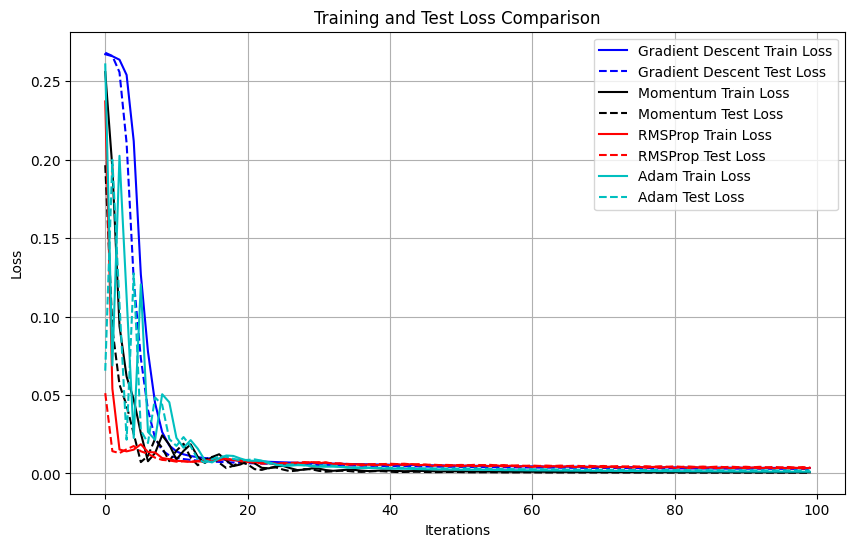

In [70]:
plt.figure(figsize = (10, 6))
for opt_name in optimizers.keys():
    color = colors[opt_name]
    plt.plot(train_losses_dict[opt_name], label = f'{opt_name} Train Loss', linestyle = '-', color = color)
    plt.plot(test_losses_dict[opt_name], label = f'{opt_name} Test Loss', linestyle = '--', color = color)
plt.title("Training and Test Loss Comparison")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()